In [0]:
import os
import zipfile
import tensorflow as tf
import numpy as np

In [2]:
!wget --no-check-certificate \
  "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
   -O "/tmp/happy-or-sad.zip"

--2019-03-19 14:47:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-03-19 14:47:38 (121 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# Unzip the training samples
base_dir = '/tmp/h-or-s'
with zipfile.ZipFile('/tmp/happy-or-sad.zip', 'r') as zip_file:
  zip_file.extractall(base_dir)

In [0]:
# define callback to stop training when accuracy is equal or greater 
# than DESIRED_ACCURACY
DESIRED_ACCURACY = 0.999
class MyCallback(tf.keras.callbacks.Callback):
  
  def on_epoch_end(self, epochs, logs={}):
    if logs['acc'] >= DESIRED_ACCURACY:
      print('Reached to {} accuracy. Stopping trainig!'.format(DESIRED_ACCURACY))
      self.model.stop_training = True
      

(150, 150, 4)

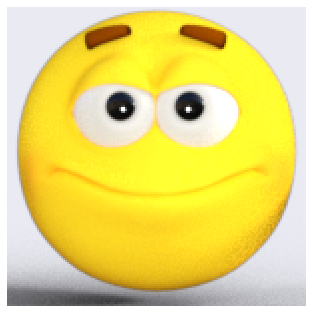

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(os.path.join(base_dir, 'happy/happy1-00.png'))
fig = plt.gcf
plt.imshow(img)
plt.grid(False)
plt.xticks([])
plt.yticks([])
img.shape

In [0]:
# Building and compiling the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [10]:
# train generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(base_dir,
                                                   target_size=(150, 150),
                                                   batch_size=16,
                                                   class_mode='binary')

Found 80 images belonging to 2 classes.


In [11]:
# train the model
callback = MyCallback()
history = model.fit_generator(train_generator,
                             steps_per_epoch=np.ceil(80/16.),
                             epochs=30,
                             callbacks=[callback])

Epoch 1/30
5/5 [==============================] - 1s 102ms/step - loss: 1.4031 - acc: 0.5500
Epoch 2/30
5/5 [==============================] - 0s 62ms/step - loss: 0.5843 - acc: 0.7000
Epoch 3/30
5/5 [==============================] - 0s 63ms/step - loss: 0.3145 - acc: 0.8875
Epoch 4/30
5/5 [==============================] - 0s 76ms/step - loss: 0.2002 - acc: 0.9375
Epoch 5/30
5/5 [==============================] - 0s 73ms/step - loss: 0.1668 - acc: 0.9250
Epoch 6/30
5/5 [==============================] - 0s 46ms/step - loss: 0.1030 - acc: 0.9750
Epoch 7/30
5/5 [==============================] - 0s 75ms/step - loss: 0.0865 - acc: 0.9625
Epoch 8/30
5/5 [==============================] - 0s 56ms/step - loss: 0.0521 - acc: 0.9875
Epoch 9/30
5/5 [==============================] - 0s 59ms/step - loss: 0.0165 - acc: 1.0000
